# Imports

In [2]:
import pandas as pd
import seaborn as sns
from owlready2 import get_ontology, Thing
import matplotlib.pyplot as plt
import copy
import numpy as np
from adjustText import adjust_text

# Get the data from the CoDex


In [4]:
tutorials_url = "https://raw.githubusercontent.com/galaxyproject/galaxy_codex/refs/heads/main/communities/microgalaxy/resources/tutorials.tsv"

In [5]:
df = pd.read_csv(tutorials_url, sep="\t")
print(df.columns)
df = df.drop_duplicates(keep="last")
#df.head()
print(df)

Index(['Topic', 'Title', 'Link', 'EDAM topic', 'EDAM operation', 'Creation',
       'Last modification', 'Version', 'Tutorial', 'Slides', 'Video',
       'Workflows', 'Tools', 'Servers with precise tool versions',
       'Servers with tool but different versions', 'Feedback number',
       'Feedback mean note', 'Visitors', 'Page views', 'Visit duration',
       'Video views'],
      dtype='object')
                Topic                                              Title  \
0            Assembly                                 Unicycler Assembly   
2            Assembly            Assembly of metagenomic sequencing data   
4            Assembly  Genome Assembly of a bacterial genome (MRSA) s...   
5             Ecology  Checking expected species and contamination in...   
8   Genome Annotation                      Genome annotation with Prokka   
11  Genome Annotation  Refining Genome Annotations with Apollo (proka...   
12  Genome Annotation   Comparative gene analysis in unannotated g

# Create new rows, one row for each EDAM term per tool - to allow to visualize tools that are in multiple terms
# EDAM Operations

In [17]:
inflated_tools_operation = []
for idx, row in df.iterrows():
    terms = row["EDAM operation"]
    row_d = row.to_dict()
    if isinstance(terms, str):
        vals = [t.strip() for t in terms.split(",")]
        for val in vals:
            row_c = copy.copy(row_d)
            row_c["EDAM operation single"] = val
            inflated_tools_operation.append(row_c)
    else:
        row_c = copy.copy(row_d)
        row_c["EDAM operation single"] = "Undefined"
        inflated_tools_operation.append(row_c)

df_inflated_operation = pd.DataFrame(inflated_tools_operation)

# Minimize data for plotting
value_counts = df_inflated_operation["EDAM operation single"].value_counts()
values = value_counts[(value_counts >= 5)]
df_inflated_mod_operation = df_inflated_operation.copy()
df_inflated_mod_operation.loc[~df_inflated_mod_operation["EDAM operation single"].isin(values.index), "EDAM operation single"] = "Other Operation"

# Split data for plotting
df_inflated_mod1_operation = df_inflated_mod_operation.loc[~df_inflated_mod_operation["EDAM operation single"].isin(["Undefined","Other Operation"])]
df_inflated_mod2_operation = df_inflated_mod_operation.loc[df_inflated_mod_operation["EDAM operation single"].isin(["Undefined","Other Operation"])]

df_inflated_operation.head()

,Topic,Title,Link,EDAM topic,EDAM operation,Creation,Last modification,Version,Tutorial,Slides,...,Tools,Servers with precise tool versions,Servers with tool but different versions,Feedback number,Feedback mean note,Visitors,Page views,Visit duration,Video views,EDAM operation single
0,Assembly,Unicycler Assembly,https://training.galaxyproject.org//topics/ass...,"Sequence assembly, Genomics, Microbiology","Genome annotation, Validation, Visualisation, ...",2017-10-11,2024-03-13,23,True,True,...,"quast, unicycler, multiqc, fastqc, prokka","UseGalaxy.eu, UseGalaxy.org (Main), UseGalaxy....","GalaxyTrakr, HyPhy HIV NGS Tools, MISSISSIPPI,...",0,NaN,2164648,5983455,4.6,0,Genome annotation
1,Assembly,Unicycler Assembly,https://training.galaxyproject.org//topics/ass...,"Sequence assembly, Genomics, Microbiology","Genome annotation, Validation, Visualisation, ...",2017-10-11,2024-03-13,23,True,True,...,"quast, unicycler, multiqc, fastqc, prokka","UseGalaxy.eu, UseGalaxy.org (Main), UseGalaxy....","GalaxyTrakr, HyPhy HIV NGS Tools, MISSISSIPPI,...",0,NaN,2164648,5983455,4.6,0,Validation
2,Assembly,Unicycler Assembly,https://training.galaxyproject.org//topics/ass...,"Sequence assembly, Genomics, Microbiology","Genome annotation, Validation, Visualisation, ...",2017-10-11,2024-03-13,23,True,True,...,"quast, unicycler, multiqc, fastqc, prokka","UseGalaxy.eu, UseGalaxy.org (Main), UseGalaxy....","GalaxyTrakr, HyPhy HIV NGS Tools, MISSISSIPPI,...",0,NaN,2164648,5983455,4.6,0,Visualisation
3,Assembly,Unicycler Assembly,https://training.galaxyproject.org//topics/ass...,"Sequence assembly, Genomics, Microbiology","Genome annotation, Validation, Visualisation, ...",2017-10-11,2024-03-13,23,True,True,...,"quast, unicycler, multiqc, fastqc, prokka","UseGalaxy.eu, UseGalaxy.org (Main), UseGalaxy....","GalaxyTrakr, HyPhy HIV NGS Tools, MISSISSIPPI,...",0,NaN,2164648,5983455,4.6,0,Coding region prediction
4,Assembly,Unicycler Assembly,https://training.galaxyproject.org//topics/ass...,"Sequence assembly, Genomics, Microbiology","Genome annotation, Validation, Visualisation, ...",2017-10-11,2024-03-13,23,True,True,...,"quast, unicycler, multiqc, fastqc, prokka","UseGalaxy.eu, UseGalaxy.org (Main), UseGalaxy....","GalaxyTrakr, HyPhy HIV NGS Tools, MISSISSIPPI,...",0,NaN,2164648,5983455,4.6,0,Genome assembly


# Process EDAM topics

In [18]:
inflated_tools_topics = []
for idx, row in df.iterrows():
    terms = row["EDAM topic"]
    row_d = row.to_dict()
    if isinstance(terms, str):
        vals = [t.strip() for t in terms.split(",")]
        for val in vals:
            row_c = copy.copy(row_d)
            row_c["EDAM topic single"] = val
            inflated_tools_topics.append(row_c)
    else:
        row_c = copy.copy(row_d)
        row_c["EDAM topic single"] = "Undefined"
        inflated_tools_topics.append(row_c)

df_inflated_topics = pd.DataFrame(inflated_tools_topics)

# Minimize data for plotting
value_counts = df_inflated_topics["EDAM topic single"].value_counts()
values = value_counts[(value_counts >= 5)]
df_inflated_mod_topics = df_inflated_topics.copy()
df_inflated_mod_topics.loc[~df_inflated_mod_topics["EDAM topic single"].isin(values.index), "EDAM topic single"] = "Other Topic"

# Split data for plotting
df_inflated_mod1_topic = df_inflated_mod_topics.loc[~df_inflated_mod_topics["EDAM topic single"].isin(["Undefined","Other Topic"])]
df_inflated_mod2_topic = df_inflated_mod_topics.loc[df_inflated_mod_topics["EDAM topic single"].isin(["Undefined"])]

df_inflated_topics.head()

,Topic,Title,Link,EDAM topic,EDAM operation,Creation,Last modification,Version,Tutorial,Slides,...,Tools,Servers with precise tool versions,Servers with tool but different versions,Feedback number,Feedback mean note,Visitors,Page views,Visit duration,Video views,EDAM topic single
0,Assembly,Unicycler Assembly,https://training.galaxyproject.org//topics/ass...,"Sequence assembly, Genomics, Microbiology","Genome annotation, Validation, Visualisation, ...",2017-10-11,2024-03-13,23,True,True,...,"quast, unicycler, multiqc, fastqc, prokka","UseGalaxy.eu, UseGalaxy.org (Main), UseGalaxy....","GalaxyTrakr, HyPhy HIV NGS Tools, MISSISSIPPI,...",0,NaN,2164648,5983455,4.60,0,Sequence assembly
1,Assembly,Unicycler Assembly,https://training.galaxyproject.org//topics/ass...,"Sequence assembly, Genomics, Microbiology","Genome annotation, Validation, Visualisation, ...",2017-10-11,2024-03-13,23,True,True,...,"quast, unicycler, multiqc, fastqc, prokka","UseGalaxy.eu, UseGalaxy.org (Main), UseGalaxy....","GalaxyTrakr, HyPhy HIV NGS Tools, MISSISSIPPI,...",0,NaN,2164648,5983455,4.60,0,Genomics
2,Assembly,Unicycler Assembly,https://training.galaxyproject.org//topics/ass...,"Sequence assembly, Genomics, Microbiology","Genome annotation, Validation, Visualisation, ...",2017-10-11,2024-03-13,23,True,True,...,"quast, unicycler, multiqc, fastqc, prokka","UseGalaxy.eu, UseGalaxy.org (Main), UseGalaxy....","GalaxyTrakr, HyPhy HIV NGS Tools, MISSISSIPPI,...",0,NaN,2164648,5983455,4.60,0,Microbiology
3,Assembly,Assembly of metagenomic sequencing data,https://training.galaxyproject.org//topics/ass...,"Metagenomics, Sequence assembly","Data handling, Visualisation, Sequence trimmin...",2024-10-13,2024-10-13,0,True,False,...,"cutadapt, bowtie2, seqtk_subseq, collection_co...",NaN,"UseGalaxy.cz, UseGalaxy.eu",0,NaN,3,3,2.35,0,Metagenomics
4,Assembly,Assembly of metagenomic sequencing data,https://training.galaxyproject.org//topics/ass...,"Metagenomics, Sequence assembly","Data handling, Visualisation, Sequence trimmin...",2024-10-13,2024-10-13,0,True,False,...,"cutadapt, bowtie2, seqtk_subseq, collection_co...",NaN,"UseGalaxy.cz, UseGalaxy.eu",0,NaN,3,3,2.35,0,Sequence assembly


# Plot EDAM operations

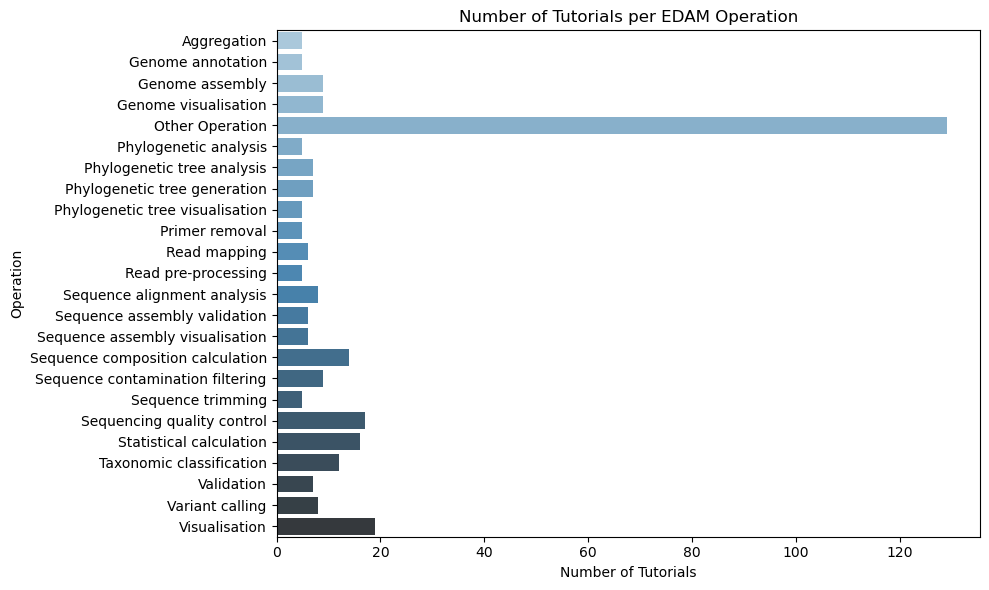

In [19]:
edam_operation_tutorials = df_inflated_mod_operation.groupby('EDAM operation single').size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=edam_operation_tutorials, x='Count', y='EDAM operation single', palette='Blues_d')
plt.title('Number of Tutorials per EDAM Operation')
plt.xlabel('Number of Tutorials')
plt.ylabel('Operation')
plt.tight_layout()
plt.savefig("../../results/jupyternotebook results/edam_operation_tutorials.png")
plt.show()

/tmp/ipykernel_10088/1905311493.py:11: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  ax2 = sns.scatterplot(data=df_inflated_mod2_operation,


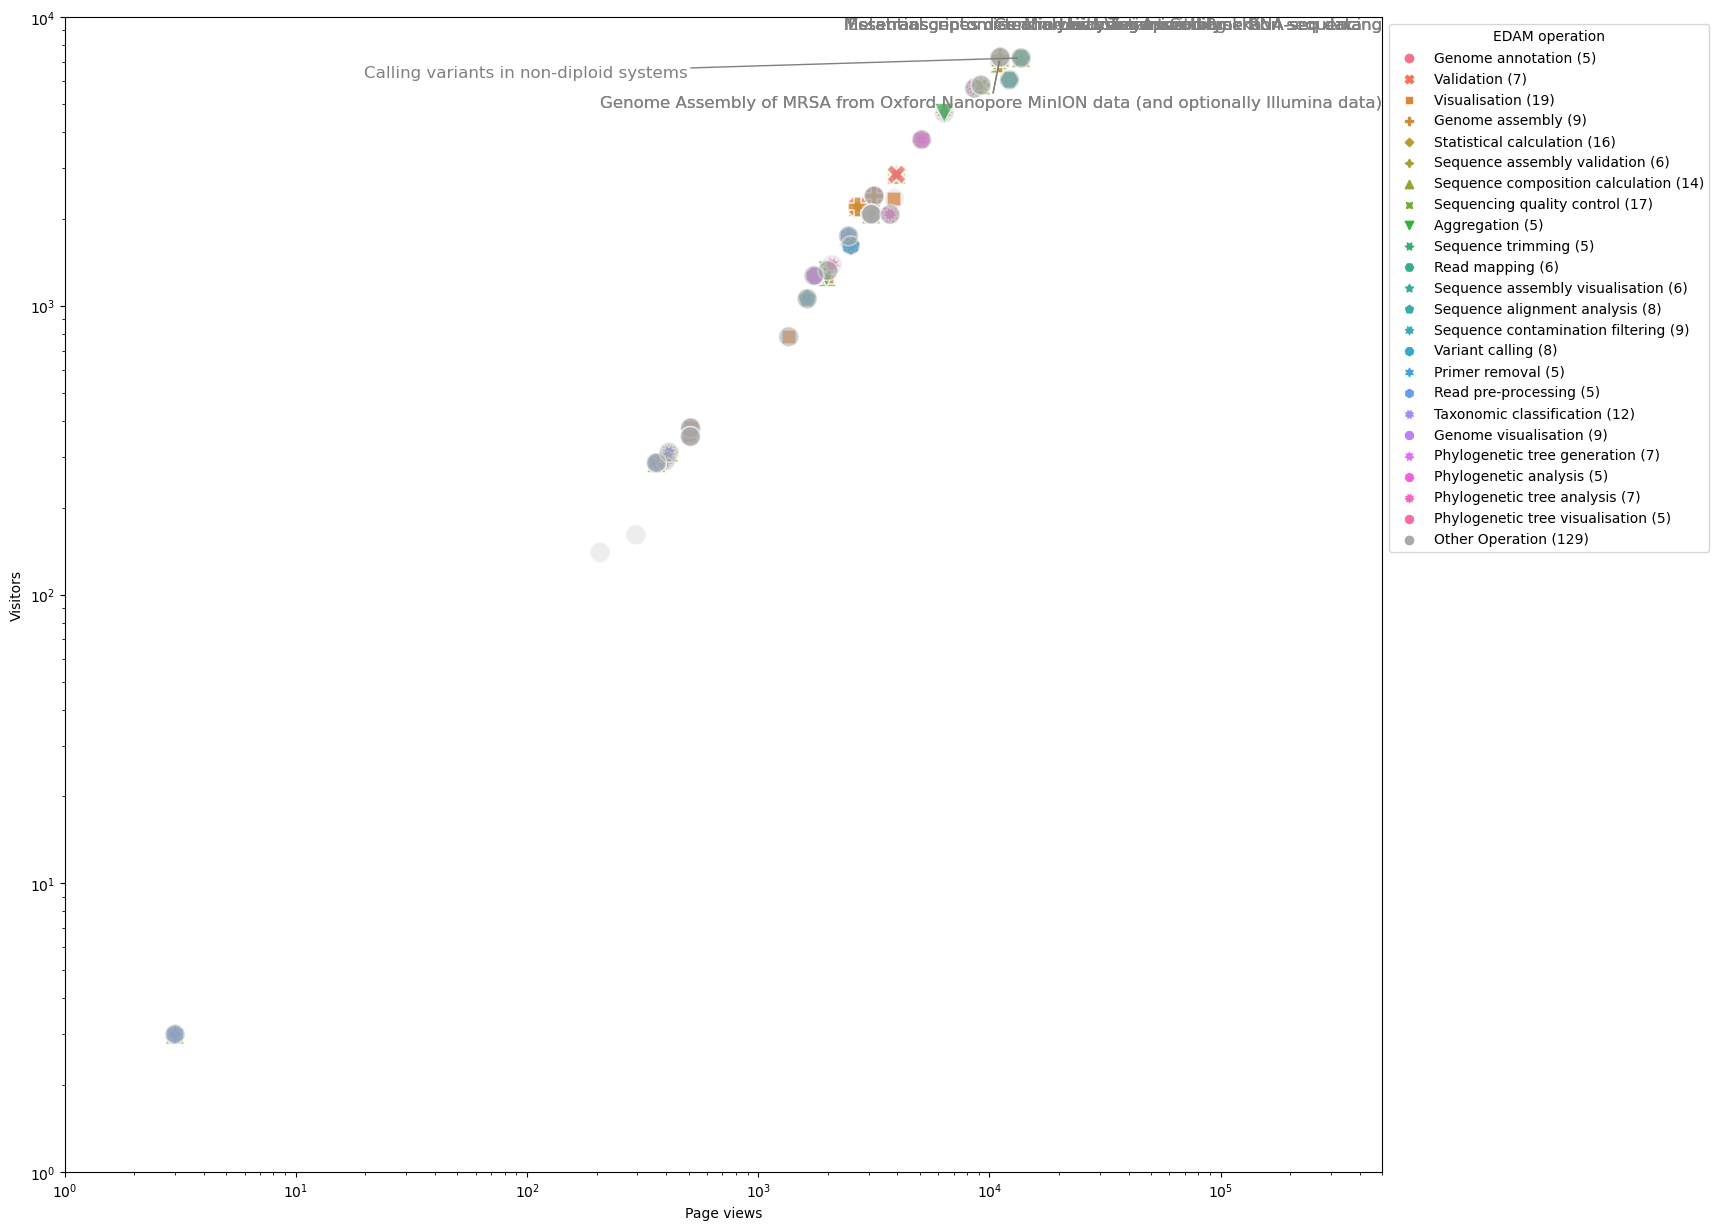

In [ ]:
plt.figure(figsize=(17,15))
s = 200
ax = sns.scatterplot(data=df_inflated_mod1_operation, 
                x='Page views', 
                y='Visitors', 
                hue="EDAM operation single",
                alpha=0.8,
                style="EDAM operation single",
                s=s)

ax2 = sns.scatterplot(data=df_inflated_mod2_operation, 
                x='Page views', 
                y='Visitors', 
                hue="EDAM operation single",
                alpha=0.2,
                palette=['darkgrey','darkgrey'],
                s=s,
                ax=ax)

# Log scale
plt.xscale('log')
plt.yscale('log')

# Increase limit to show all labels
ax.set(ylim=(1, 10000), xlim=(1,500000))

# Label highest used tools for each group
max_idx = df_inflated_mod1_operation.groupby(["EDAM operation single"])['Page views'].transform("max") == df_inflated_mod1_operation['Page views']
df_inflated_mod_slice = df_inflated_mod1_operation[max_idx]
texts = []
for i, row in df_inflated_mod_slice.iterrows():
    x = row['Page views']
    y = row['Visitors']
    name = row['Title']
    t = ax.text(x, y, name, ha='center', va='center', color='grey', size=12)
    texts.append(t)

adjust_text(texts, expand=(3, 2), arrowprops=dict(arrowstyle='->', color='grey'))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
value_counts = df_inflated_mod_operation["EDAM operation single"].value_counts()

for i, k in value_counts.items():
    for text in ax2.get_legend().texts:
        if i == text.get_text():
            text.set_text(f'{i} ({k})')

ax2.get_legend().set_title("EDAM operation")
plt.savefig("../../results/jupyternotebook results/tutorials_operations.png", bbox_inches='tight')



In [11]:
# Verify the column names
print(df.columns)

# Process EDAM operations
inflated_tools_operation = []
for idx, row in df.iterrows():
    terms = row["EDAM operation"]
    row_d = row.to_dict()
    if isinstance(terms, str):
        vals = [t.strip() for t in terms.split(",")]
        for val in vals:
            row_c = copy.copy(row_d)
            row_c["EDAM operation single"] = val
            inflated_tools_operation.append(row_c)
    else:
        row_c = copy.copy(row_d)
        row_c["EDAM operation single"] = "Undefined"
        inflated_tools_operation.append(row_c)

df_inflated_operation = pd.DataFrame(inflated_tools_operation)

# Minimize data for plotting
value_counts = df_inflated_operation["EDAM operation single"].value_counts()
values = value_counts[(value_counts >= 5)]
df_inflated_mod_operation = df_inflated_operation.copy()
df_inflated_mod_operation.loc[~df_inflated_mod_operation["EDAM operation single"].isin(values.index), "EDAM operation single"] = "Other Operation"

# Split data for plotting, exclude "Other Operation"
df_inflated_mod1_operation = df_inflated_mod_operation.loc[~df_inflated_mod_operation["EDAM operation single"].isin(["Undefined", "Other Operation"])]
df_inflated_mod2_operation = df_inflated_mod_operation.loc[df_inflated_mod_operation["EDAM operation single"].isin(["Undefined"])]

# Verify the column names again before plotting
print(df_inflated_mod1_operation.columns)

Index(['Topic', 'Title', 'Link', 'EDAM topic', 'EDAM operation', 'Creation',
       'Last modification', 'Version', 'Tutorial', 'Slides', 'Video',
       'Workflows', 'Tools', 'Servers with precise tool versions',
       'Servers with tool but different versions', 'Feedback number',
       'Feedback mean note', 'Visitors', 'Page views', 'Visit duration',
       'Video views'],
      dtype='object')
Index(['Topic', 'Title', 'Link', 'EDAM topic', 'EDAM operation', 'Creation',
       'Last modification', 'Version', 'Tutorial', 'Slides', 'Video',
       'Workflows', 'Tools', 'Servers with precise tool versions',
       'Servers with tool but different versions', 'Feedback number',
       'Feedback mean note', 'Visitors', 'Page views', 'Visit duration',
       'Video views', 'EDAM operation single'],
      dtype='object')


/tmp/ipykernel_10088/3933679658.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax2 = sns.scatterplot(data=df_filtered_mod2_operation,


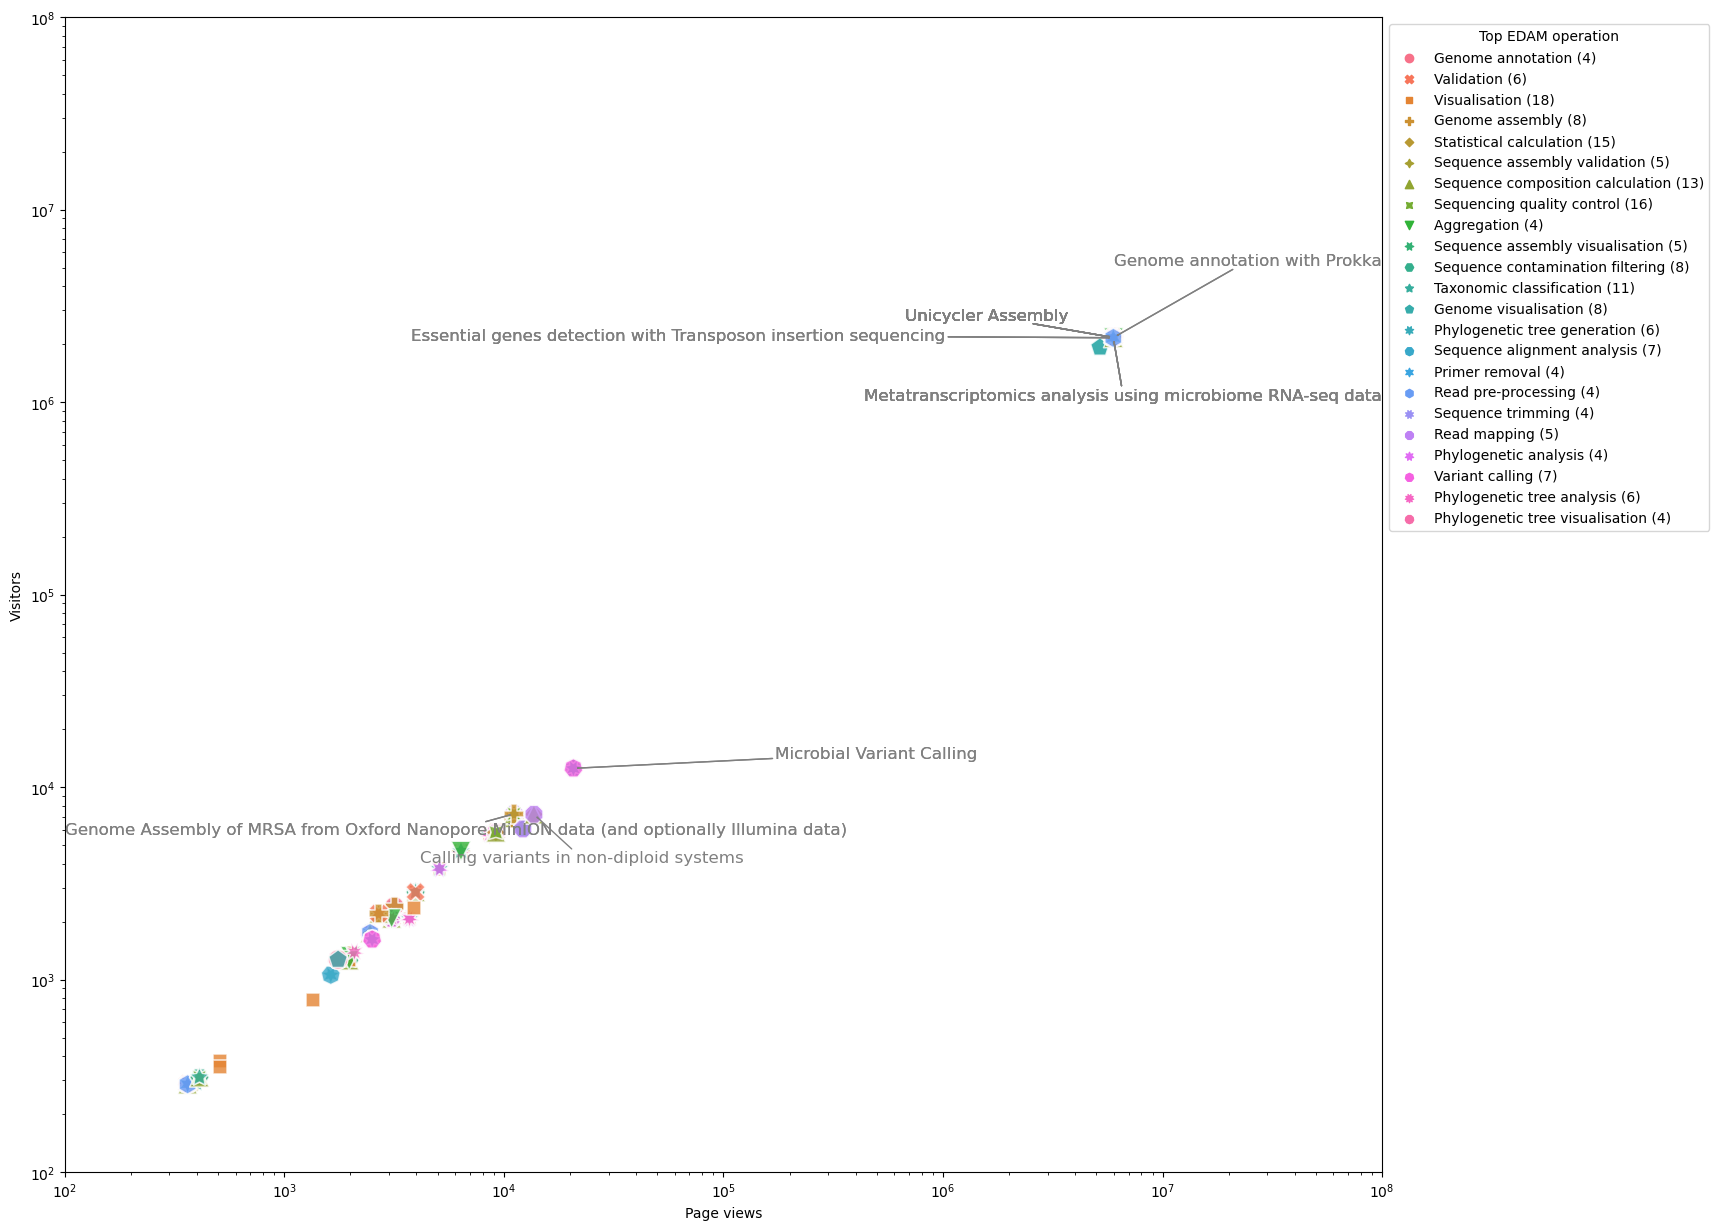

In [ ]:
# Filter data to only include rows with more than 100 page views and visitors
df_filtered_mod1_operation = df_inflated_mod1_operation[(df_inflated_mod1_operation['Page views'] > 100) & (df_inflated_mod1_operation['Visitors'] > 100)]
df_filtered_mod2_operation = df_inflated_mod2_operation[(df_inflated_mod2_operation['Page views'] > 100) & (df_inflated_mod2_operation['Visitors'] > 100)]

plt.figure(figsize=(17,15))
s = 200
ax = sns.scatterplot(data=df_filtered_mod1_operation, 
                x='Page views', 
                y='Visitors', 
                hue="EDAM operation single",
                alpha=0.8,
                style="EDAM operation single",
                s=s)

ax2 = sns.scatterplot(data=df_filtered_mod2_operation, 
                x='Page views', 
                y='Visitors', 
                hue="EDAM operation single",
                alpha=0.2,
                palette=['darkgrey'],
                s=s,
                ax=ax)

# Log scale
plt.xscale('log')
plt.yscale('log')

# Increase limit to show all labels
ax.set(ylim=(100, 100000000), xlim=(100,100000000))

# Label highest used tutorials for each group
max_idx = df_filtered_mod1_operation.groupby(["EDAM operation single"])['Page views'].transform("max") == df_filtered_mod1_operation['Page views']
df_inflated_mod_slice = df_filtered_mod1_operation[max_idx]
texts = []
for i, row in df_inflated_mod_slice.iterrows():
    x = row['Page views']
    y = row['Visitors']
    name = row['Title']
    t = ax.text(x, y, name, ha='center', va='center', color='grey', size=12)
    texts.append(t)

adjust_text(texts, expand=(3, 2), arrowprops=dict(arrowstyle='->', color='grey'))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
value_counts = df_inflated_mod_operation["EDAM operation single"].value_counts()-1

for i, k in value_counts.items():
    for text in ax2.get_legend().texts:
        if i == text.get_text():
            text.set_text(f'{i} ({k})')

ax2.get_legend().set_title("Top EDAM operation")
plt.savefig("../../results/jupyternotebook results/top_tutorials_operations.png", bbox_inches='tight')

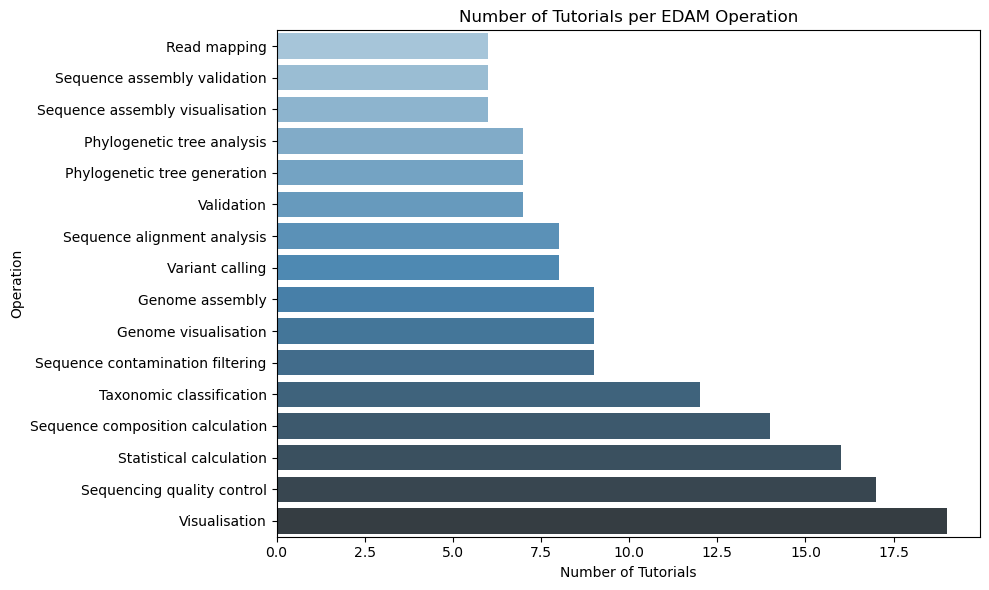

In [ ]:
edam_operation_tutorials = df_inflated_operation.groupby('EDAM operation single').size().reset_index(name='Count')
edam_operation_tutorials = edam_operation_tutorials[(edam_operation_tutorials['Count'] > 5)]

plt.figure(figsize=(10, 6))
sns.barplot(data=edam_operation_tutorials.sort_values('Count'), x='Count', y='EDAM operation single', palette='Blues_d')
plt.title('Number of Tutorials per EDAM Operation')
plt.xlabel('Number of Tutorials')
plt.ylabel('Operation')
plt.tight_layout()
plt.savefig("../../results/jupyternotebook results/edam_operation_tutorials.png")
plt.show()

In [20]:
# Statistics
unique_tutorials = df["Title"].nunique()
unique_operations = df_inflated_operation["EDAM operation single"].nunique()
unique_topics = df_inflated_topics["EDAM topic single"].nunique()

# Tutorial titles by EDAM operation
titles_by_operation = df_inflated_mod_operation.groupby("EDAM operation single")["Title"].unique()

# Tutorial titles by EDAM topic
titles_by_topic = df_inflated_mod_topics.groupby("EDAM topic single")["Title"].unique()

# Print statistics
print(f"Total number of unique tutorials: {unique_tutorials}")
print(f"Total number of unique EDAM operations: {unique_operations}")
print(f"Total number of unique EDAM topics: {unique_topics}")

print("\nTutorial Titles by EDAM Operation:")
for operation, titles in titles_by_operation.items():
    print(f"\n{operation} ({len(titles)} tutorials):")
    for title in titles:
        print(f" - {title}")

print("\nTutorial Titles by EDAM Topic:")
for topic, titles in titles_by_topic.items():
    print(f"\n{topic} ({len(titles)} tutorials):")
    for title in titles:
        print(f" - {title}")

Total number of unique tutorials: 36
Total number of unique EDAM operations: 84
Total number of unique EDAM topics: 24

Tutorial Titles by EDAM Operation:

Aggregation (5 tutorials):
 - Unicycler Assembly
 - Pathogen detection from (direct Nanopore) sequencing data using Galaxy - Foodborne Edition
 - Antibiotic resistance detection
 - Taxonomic Profiling and Visualization of Metagenomic Data
 - Identification of the micro-organisms in a beer using Nanopore sequencing

Genome annotation (4 tutorials):
 - Unicycler Assembly
 - Genome annotation with Prokka
 - Bacterial Genome Annotation
 - Identification of AMR genes in an assembled bacterial genome

Genome assembly (8 tutorials):
 - Unicycler Assembly
 - Assembly of metagenomic sequencing data
 - Genome Assembly of a bacterial genome (MRSA) sequenced using Illumina MiSeq Data
 - Bacterial Genome Annotation
 - Genome Assembly of MRSA from Oxford Nanopore MinION data (and optionally Illumina data)
 - Pathogen detection from (direct Nanopo

In [ ]:
# Statistics
unique_tutorials = df["Title"].nunique()
unique_operations = df_inflated_operation["EDAM operation single"].nunique()
unique_topics = df_inflated_topics["EDAM topic single"].nunique()

# Count videos and workflows per tutorial with additional checks for string type
df["Video Count"] = df["Video"].apply(lambda x: len(x.split(',')) if isinstance(x, str) and x.strip() else 0)
df["Workflow Count"] = df["Workflows"].apply(lambda x: len(x.split(',')) if isinstance(x, str) and x.strip() else 0)

# Calculate tutorials with associated videos and workflows (count of True values in each column)
tutorials_with_videos = df["Video"].sum()
tutorials_with_workflows = df["Workflows"].sum()

# Calculate the total number of videos and workflows
total_videos = df[df["Video"] == True].shape[0]  # Total number of True values in Video column
total_workflows = df[df["Workflows"] == True].shape[0]  # Total number of True values in Workflows column

# Calculate percentages
percentage_with_videos = (tutorials_with_videos / unique_tutorials) * 100
percentage_with_workflows = (tutorials_with_workflows / unique_tutorials) * 100

# Print statistics
print(f"Total number of unique tutorials: {unique_tutorials}")
print(f"Total number of unique EDAM operations: {unique_operations}")
print(f"Total number of unique EDAM topics: {unique_topics}")
print(f"Total number of unique tutorials: {unique_tutorials}")
print(f"Total number of tutorials with associated videos: {tutorials_with_videos}")
print(f"Percentage of tutorials with videos: {percentage_with_videos:.2f}%")
print(f"Total number of videos: {total_videos}")

print(f"Total number of tutorials with associated workflows: {tutorials_with_workflows}")
print(f"Percentage of tutorials with workflows: {percentage_with_workflows:.2f}%")
print(f"Total number of workflows: {total_workflows}")

print("\nTutorial Titles by EDAM Operation:")
for operation, titles in titles_by_operation.items():
    print(f"\n{operation} ({len(titles)} tutorials):")
    for title in titles:
        print(f" - {title}")

print("\nTutorial Titles by EDAM Topic:")
for topic, titles in titles_by_topic.items():
    print(f"\n{topic} ({len(titles)} tutorials):")
    for title in titles:
        print(f" - {title}")

Total number of unique tutorials: 36
Total number of unique EDAM operations: 84
Total number of unique EDAM topics: 24
Total number of unique tutorials: 36
Total number of tutorials with associated videos: 4
Percentage of tutorials with videos: 11.11%
Total number of videos: 4
Total number of tutorials with associated workflows: 36
Percentage of tutorials with workflows: 100.00%
Total number of workflows: 36

Tutorial Titles by EDAM Operation:

Aggregation (5 tutorials):
 - Unicycler Assembly
 - Pathogen detection from (direct Nanopore) sequencing data using Galaxy - Foodborne Edition
 - Antibiotic resistance detection
 - Taxonomic Profiling and Visualization of Metagenomic Data
 - Identification of the micro-organisms in a beer using Nanopore sequencing

Genome annotation (4 tutorials):
 - Unicycler Assembly
 - Genome annotation with Prokka
 - Bacterial Genome Annotation
 - Identification of AMR genes in an assembled bacterial genome

Genome assembly (8 tutorials):
 - Unicycler Assemb

# Plot EDAM topics

/tmp/ipykernel_10088/1559839171.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax2 = sns.scatterplot(data=df_inflated_mod2_topic,


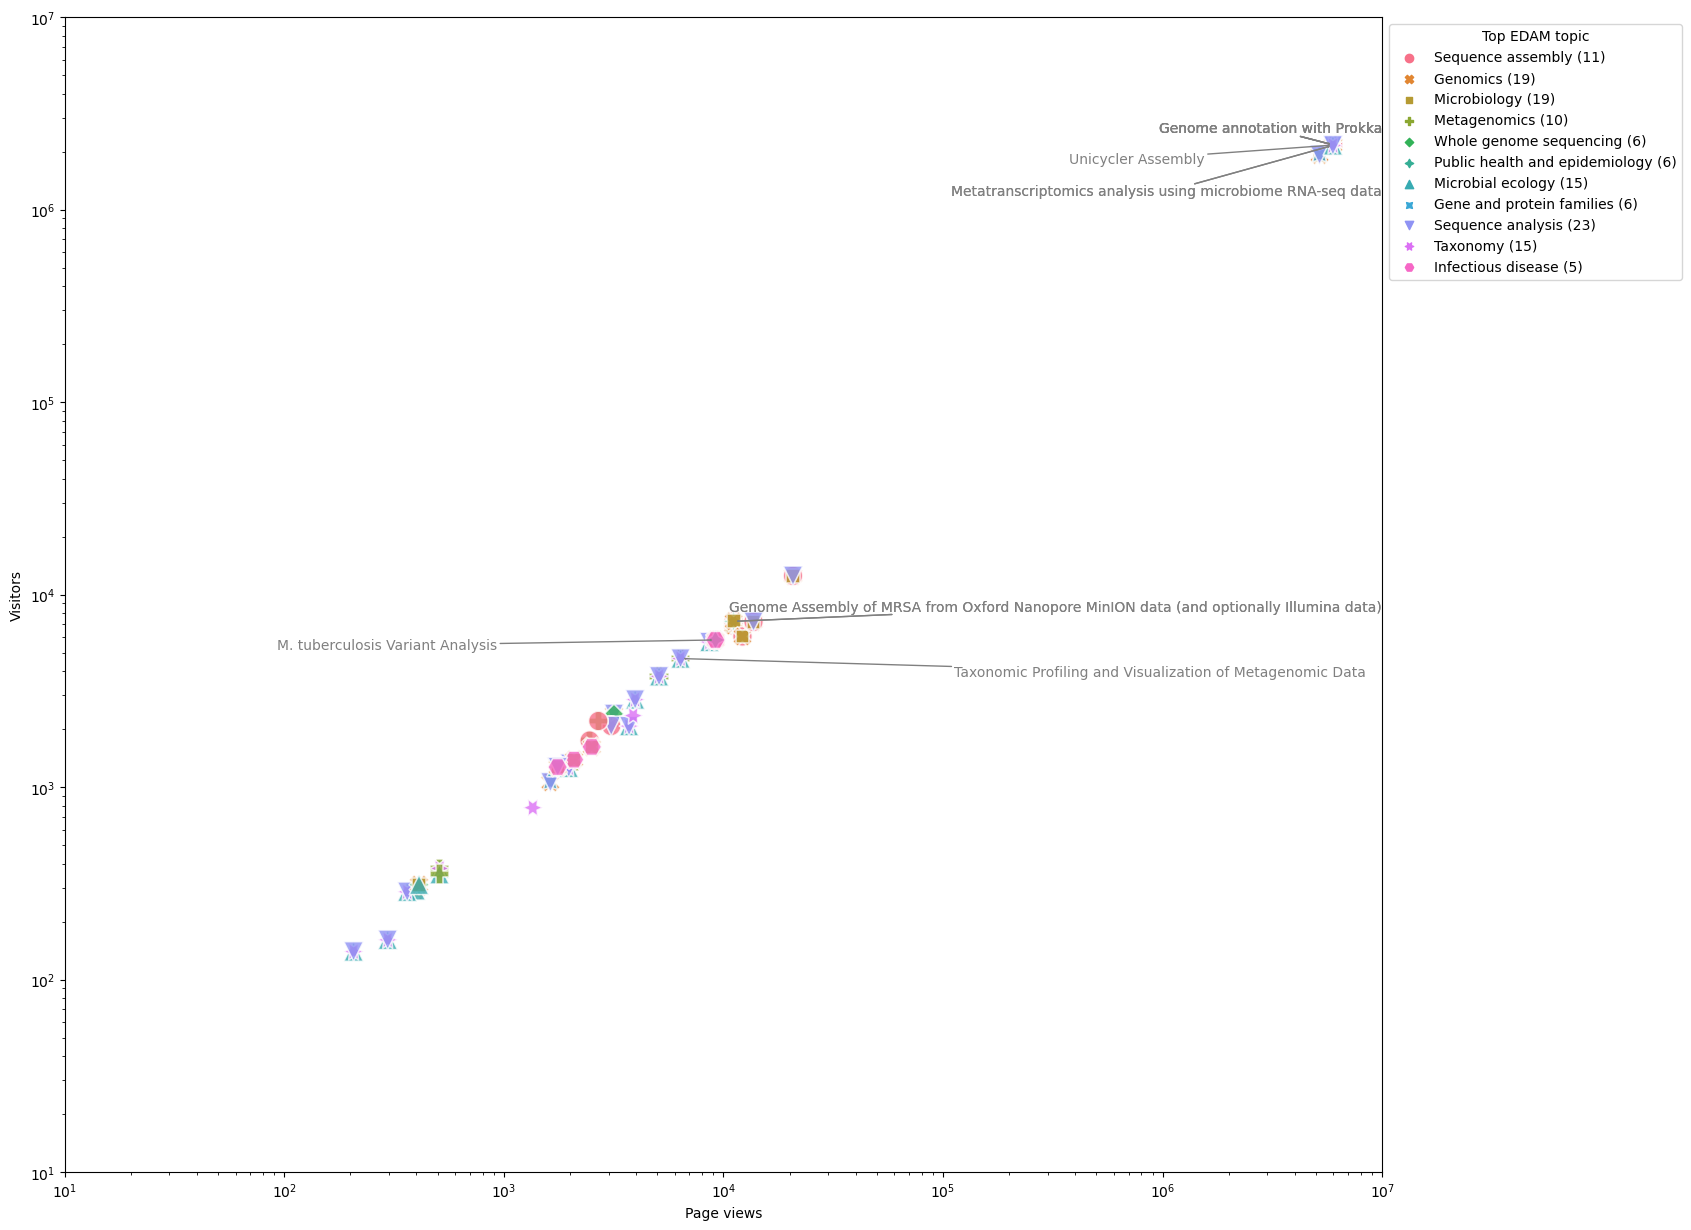

In [ ]:
plt.figure(figsize=(17,15))
ax = sns.scatterplot(data=df_inflated_mod1_topic, 
                x='Page views', 
                y='Visitors', 
                hue="EDAM topic single",
                alpha=0.8,
                style="EDAM topic single",
                s=s)

ax2 = sns.scatterplot(data=df_inflated_mod2_topic, 
                x='Page views', 
                y='Visitors', 
                hue="EDAM topic single",
                alpha=0.2,
                palette=['darkgrey','darkgrey'],
                s=s,
                ax=ax)

plt.xscale('log')
plt.yscale('log')
ax.set(ylim=(10, 10000000), xlim=(10,10000000))
max_idx = df_inflated_mod1_topic.groupby(["EDAM topic single"])['Page views'].transform("max") == df_inflated_mod1_topic['Page views']
df_inflated_mod_slice = df_inflated_mod1_topic[max_idx]
texts = []
for i, row in df_inflated_mod_slice.iterrows():
    x = row['Page views']
    y = row['Visitors']
    name = row['Title']
    t = ax.text(x, y, name, ha='center', va='center', color='grey', size=10)
    texts.append(t)

adjust_text(texts, expand=(3, 2), arrowprops=dict(arrowstyle='->', color='grey'))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
value_counts = df_inflated_mod_topics["EDAM topic single"].value_counts()

for i, k in value_counts.items():
    for text in ax2.get_legend().texts:
        if i == text.get_text():
            text.set_text(f'{i} ({k})')

ax2.get_legend().set_title("Top EDAM topic")
plt.savefig("../../results/jupyternotebook results/top_tutorials_topics.png", bbox_inches='tight')

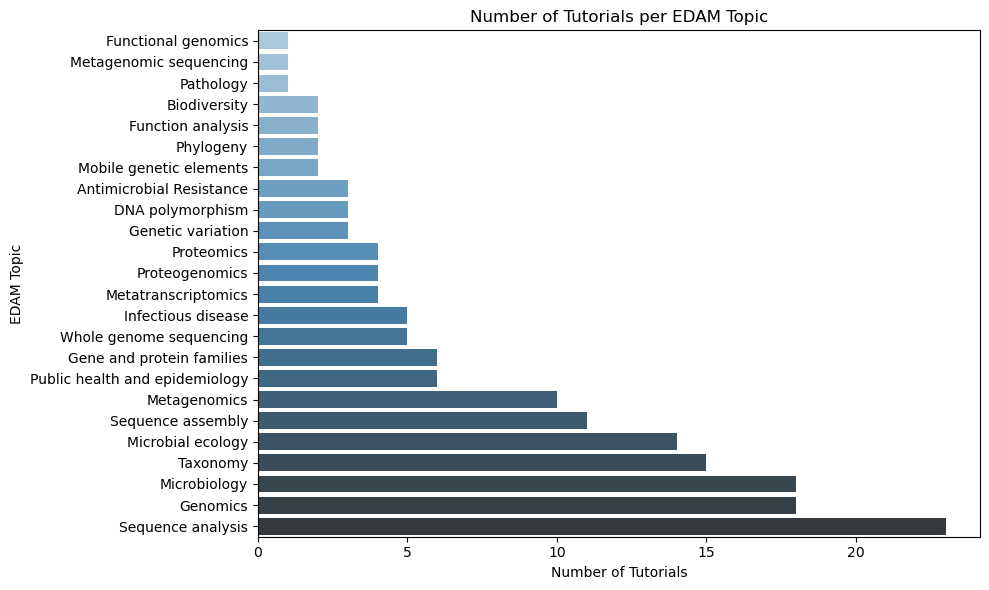

In [ ]:
edam_topic_tutorials = df_inflated_topics.groupby('EDAM topic single').size().reset_index(name='Count')
#edam_topic_tutorials = edam_topic_tutorials[(edam_topic_tutorials['Count'] > 5)]

plt.figure(figsize=(10, 6))
sns.barplot(data=edam_topic_tutorials.sort_values('Count'), x='Count', y='EDAM topic single', palette='Blues_d')
plt.title('Number of Tutorials per EDAM Topic')
plt.xlabel('Number of Tutorials')
plt.ylabel('EDAM Topic')
plt.tight_layout()
plt.savefig("../../results/jupyternotebook results/edam_topic_tutorials.png")
plt.show()

# Read the data


In [22]:
tutorials_df = pd.read_csv(tutorials_url, sep='\t')
tutorials_df.drop_duplicates()
tutorials_df.to_csv('tutorials.csv', index=False)

# Inspect the dataframe

In [23]:
print(tutorials_df.head())
print(tutorials_df.columns)

      Topic                                              Title  \
0  Assembly                                 Unicycler Assembly   
1  Assembly  Genome Assembly of MRSA from Oxford Nanopore M...   
2  Assembly            Assembly of metagenomic sequencing data   
3  Assembly           Making sense of a newly assembled genome   
4  Assembly  Genome Assembly of a bacterial genome (MRSA) s...   

                                                Link  \
0  https://training.galaxyproject.org//topics/ass...   
1  https://training.galaxyproject.org//topics/ass...   
2  https://training.galaxyproject.org//topics/ass...   
3  https://training.galaxyproject.org//topics/ass...   
4  https://training.galaxyproject.org//topics/ass...   

                                          EDAM topic  \
0          Sequence assembly, Genomics, Microbiology   
1  Sequence assembly, Whole genome sequencing, Pu...   
2                    Metagenomics, Sequence assembly   
3          Sequence assembly, Genomics, Mi

# Summarize the number of tutorials per topic

In [24]:
tutorials_per_topic = tutorials_df.groupby('Topic').size().reset_index(name='Count')

# Plot the number of tutorials per topic

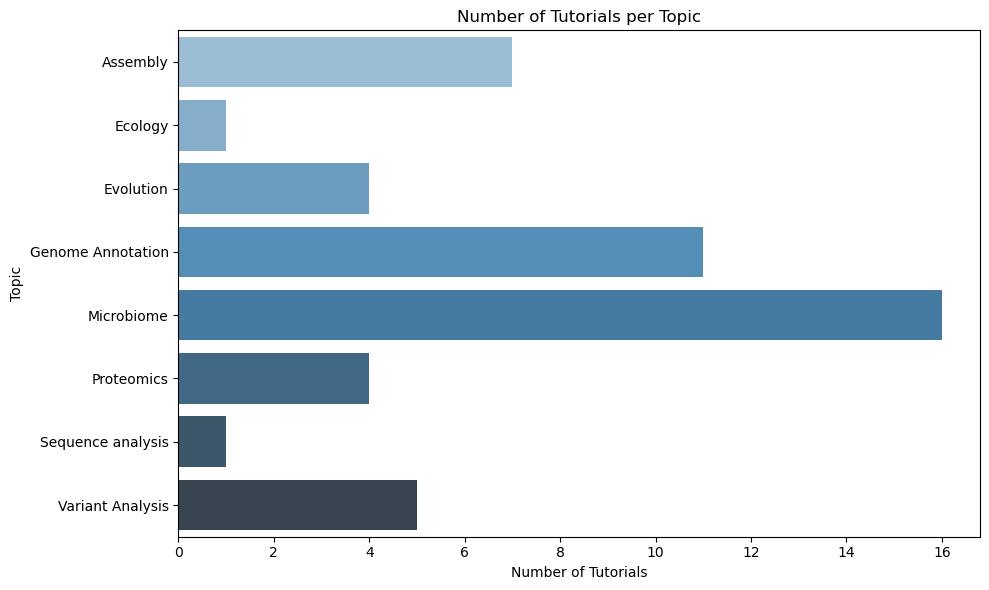

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tutorials_per_topic, x='Count', y='Topic', palette='Blues_d')
plt.title('Number of Tutorials per Topic')
plt.xlabel('Number of Tutorials')
plt.ylabel('Topic')
plt.tight_layout()
plt.savefig("../../results/jupyternotebook results/tutorials_per_topic.png")
plt.show()

# Identify the most visited tutorials

In [26]:
most_visited_tutorials = tutorials_df.nlargest(10, 'Page views')

# Plot the most visited tutorials

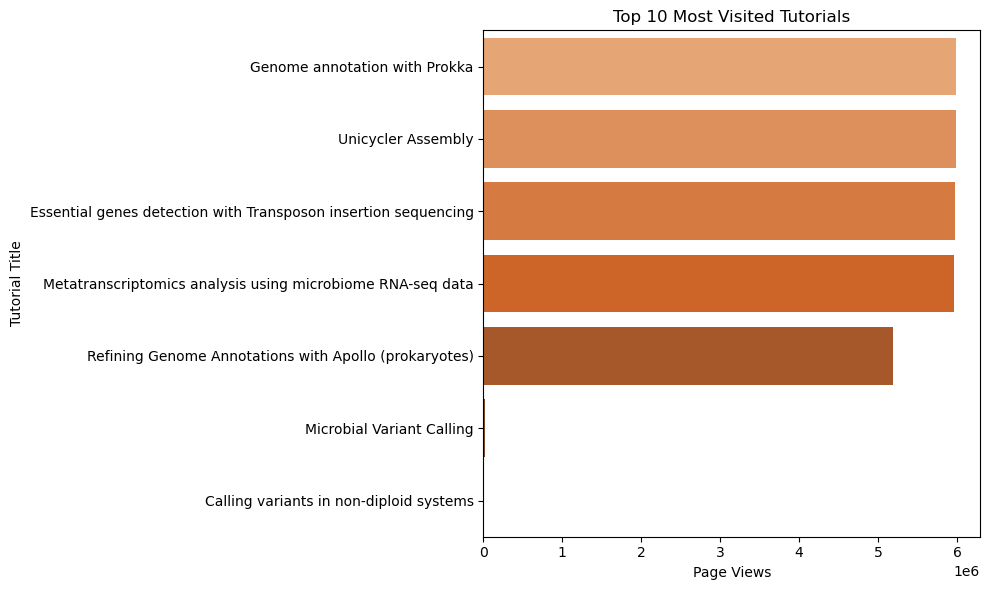

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(data=most_visited_tutorials, x='Page views', y='Title', palette='Oranges_d')
plt.title('Top 10 Most Visited Tutorials')
plt.xlabel('Page Views')
plt.ylabel('Tutorial Title')
plt.tight_layout()
plt.savefig("../../results/jupyternotebook results/most_visited_tutorials.png")
plt.show()

# Summarize video views per topic

In [28]:
video_views_per_topic = tutorials_df.groupby('Topic')['Video views'].sum().reset_index()

# Plot video views per topic

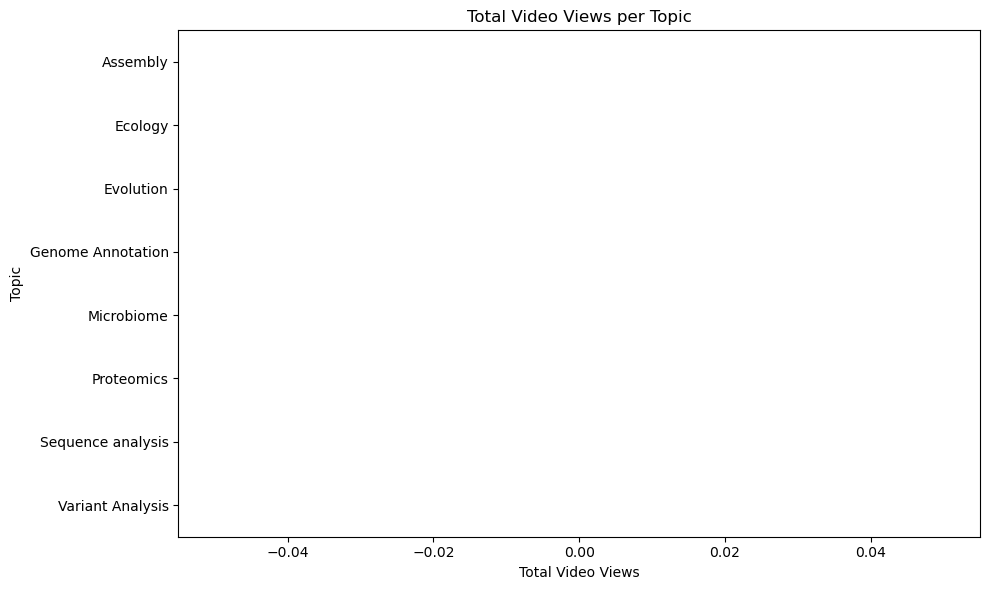

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(data=video_views_per_topic, x='Video views', y='Topic', palette='Purples_d')
plt.title('Total Video Views per Topic')
plt.xlabel('Total Video Views')
plt.ylabel('Topic')
plt.tight_layout()
plt.savefig("../../results/jupyternotebook results/video_views_per_topic.png")
plt.show()

# Average feedback score per topic

In [30]:
avg_feedback_per_topic = tutorials_df.groupby('Topic')['Feedback mean note'].mean().reset_index()

# Plot average feedback score per topic

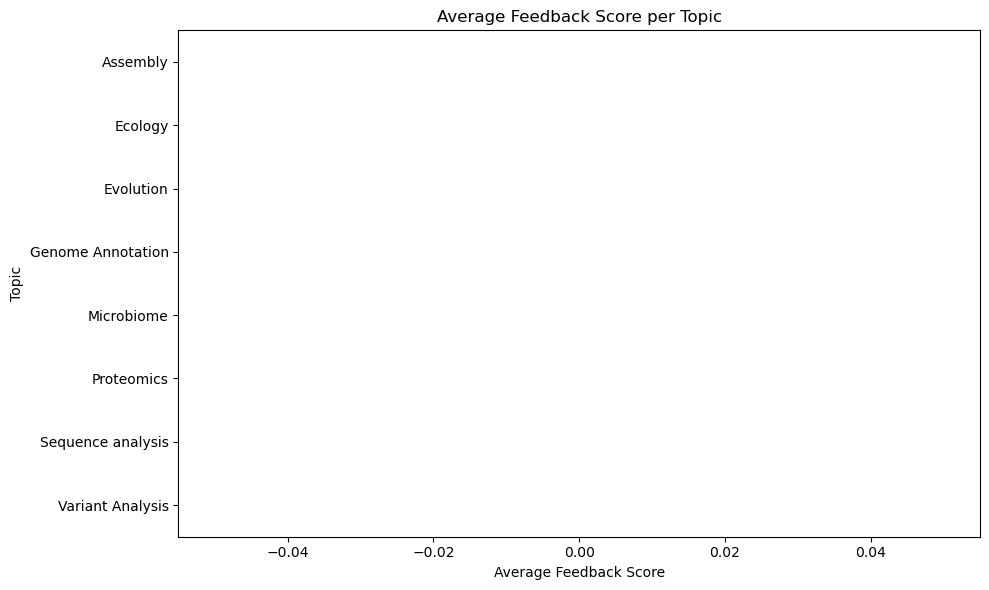

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_feedback_per_topic, x='Feedback mean note', y='Topic', palette='Blues_d')
plt.title('Average Feedback Score per Topic')
plt.xlabel('Average Feedback Score')
plt.ylabel('Topic')
plt.tight_layout()
plt.savefig("../../results/jupyternotebook results/avg_feedback_per_topic.png")
plt.show()

# Number of tutorials with workflows per topic

In [12]:
tutorials_with_workflows = tutorials_df[tutorials_df['Workflows'].notna() & (tutorials_df['Workflows'] != '')].groupby('Topic').size().reset_index(name='Count')

# Plot number of tutorials with workflows per topic

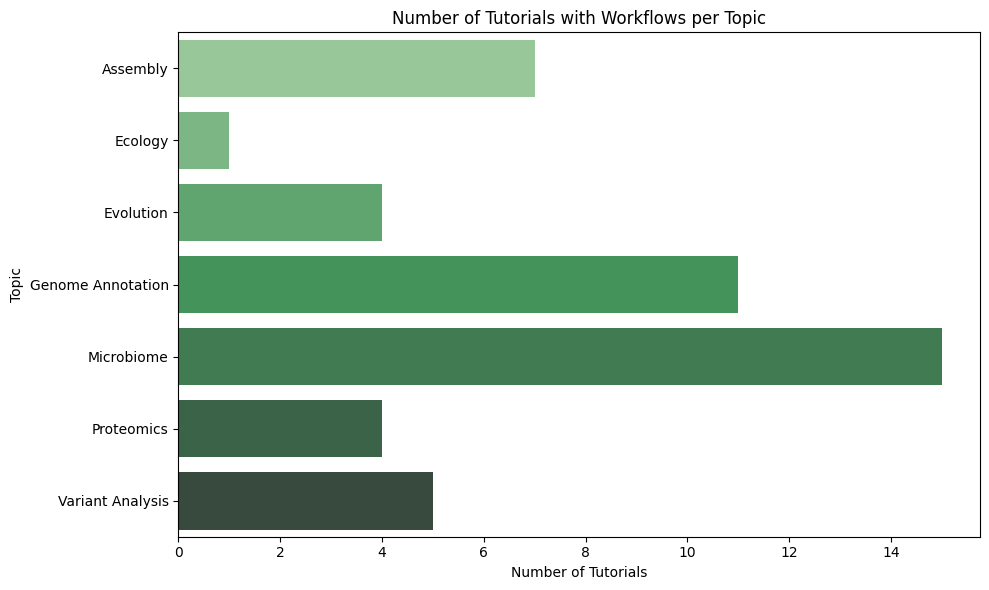

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tutorials_with_workflows, x='Count', y='Topic', palette='Greens_d')
plt.title('Number of Tutorials with Workflows per Topic')
plt.xlabel('Number of Tutorials')
plt.ylabel('Topic')
plt.tight_layout()
plt.savefig("../../results/jupyternotebook results/tutorials_with_workflows_per_topic.png")
plt.show()

# Distribution of feedback scores

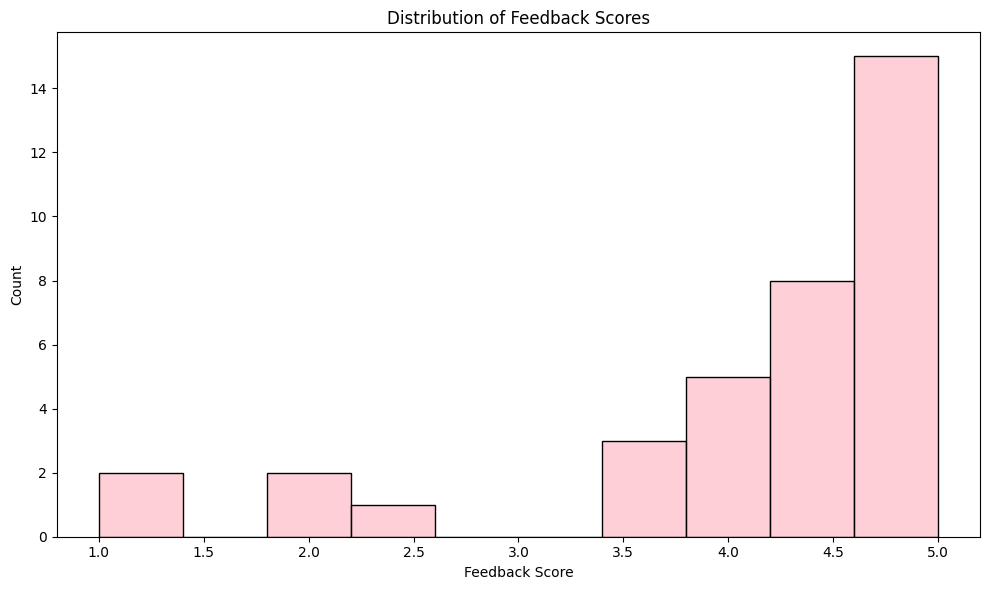

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(tutorials_df['Feedback mean note'], bins=10, kde=False, color='pink')
plt.title('Distribution of Feedback Scores')
plt.xlabel('Feedback Score')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig("../../results/jupyternotebook results/feedback_score_distribution.png")
plt.show()

# Relationship between feedback score and visitors

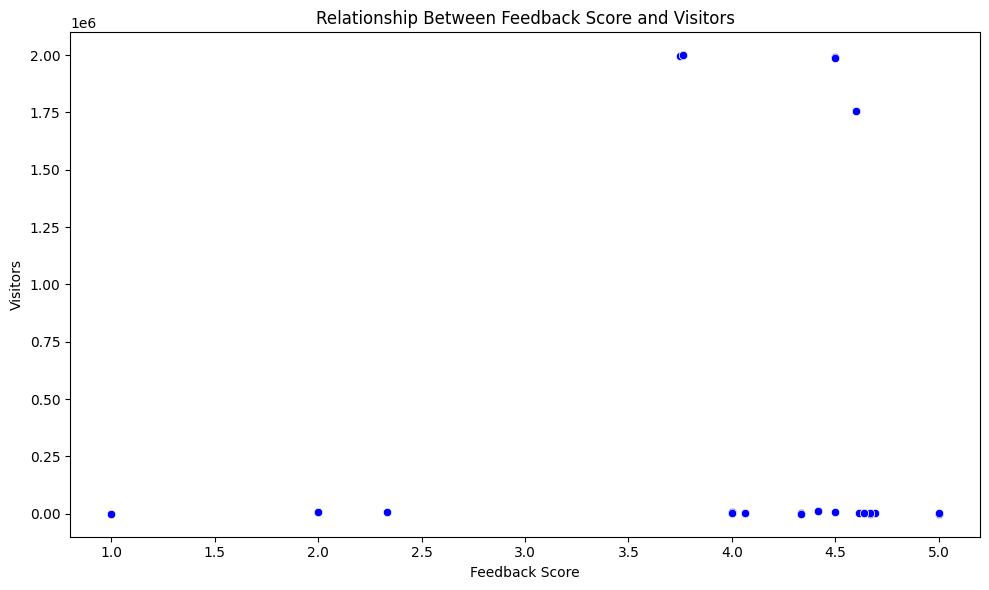

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tutorials_df, x='Feedback mean note', y='Visitors', color='blue')
plt.title('Relationship Between Feedback Score and Visitors')
plt.xlabel('Feedback Score')
plt.ylabel('Visitors')
plt.tight_layout()
plt.savefig("../../results/jupyternotebook results/feedback_vs_visitors.png")
plt.show()

# Bar Chart of Tutorial Topics (Total Page Views per Topic)

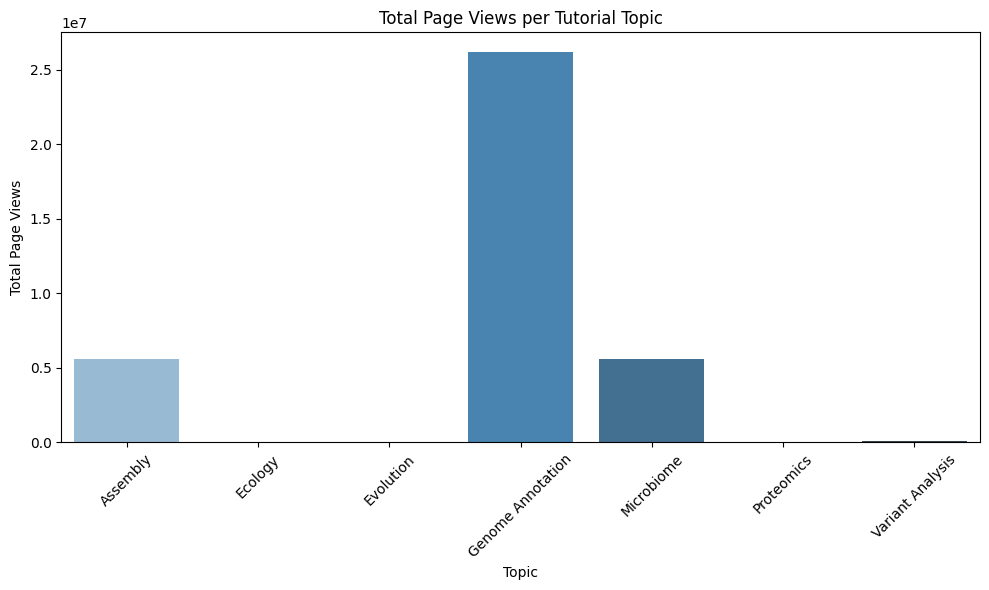

In [ ]:
page_views_per_topic = tutorials_df.groupby('Topic')['Page views'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=page_views_per_topic, x='Topic', y='Page views', palette='Blues_d')
plt.title('Total Page Views per Tutorial Topic')
plt.xlabel('Topic')
plt.ylabel('Total Page Views')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../../results/jupyternotebook results/page_views_per_topic.png")
plt.show()

# Stacked Bar Chart of Workflow Components (for simplicity, using number of tutorials with workflows per topic)

<Figure size 1000x600 with 0 Axes>

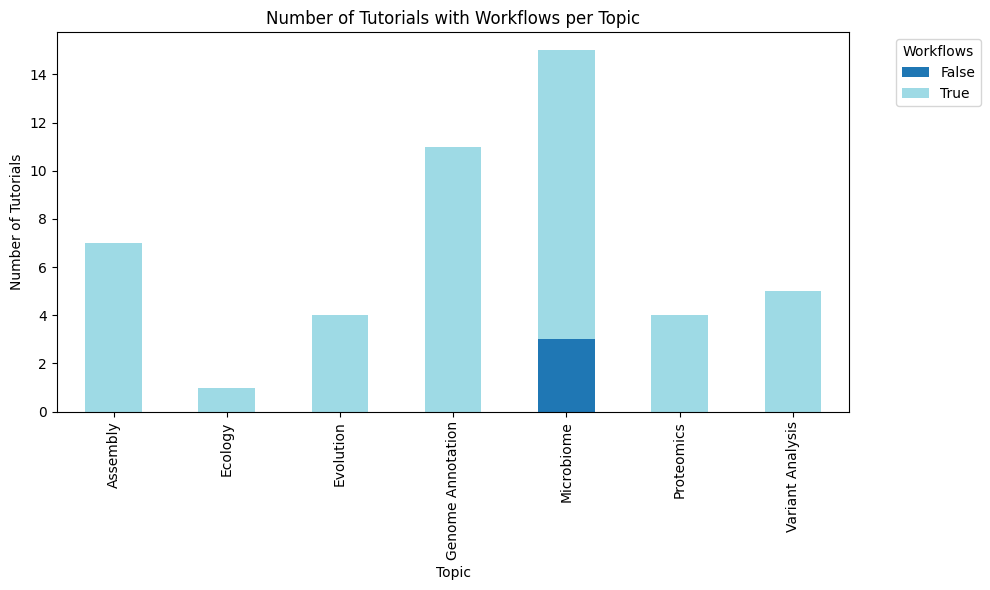

In [ ]:
plt.figure(figsize=(10, 6))
tutorials_with_workflows_per_tool = tutorials_df[tutorials_df['Workflows'].notna() & (tutorials_df['Workflows'] != '')].groupby(['Topic', 'Workflows']).size().unstack(fill_value=0)

tutorials_with_workflows_per_tool.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10, 6))
plt.title('Number of Tutorials with Workflows per Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Tutorials')
plt.legend(title='Workflows', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("../../results/jupyternotebook results/stacked_workflow_components.png")
plt.show()

# Heatmap of Workflow Usage (using the number of tutorials with workflows per topic)

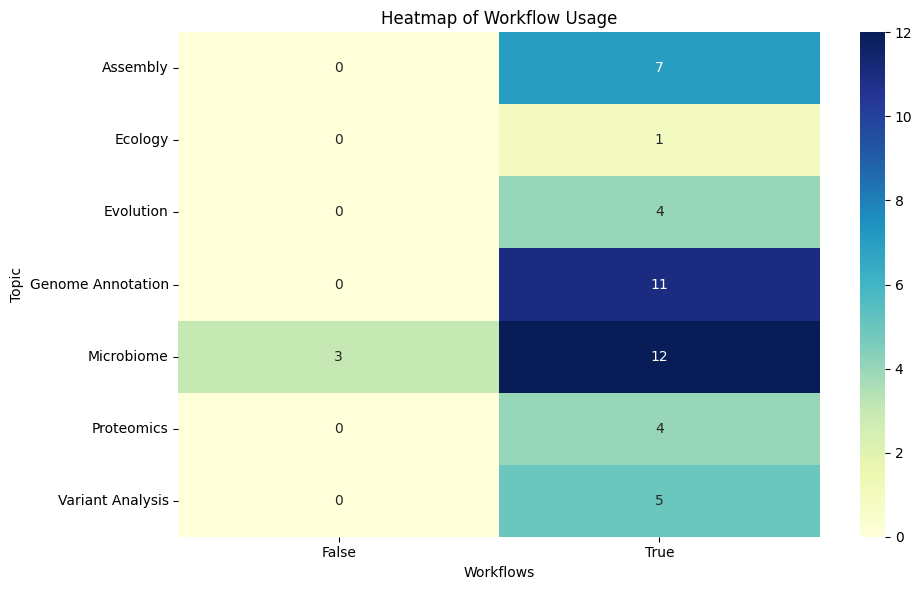

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(tutorials_with_workflows_per_tool, cmap="YlGnBu", annot=True, fmt='d')
plt.title('Heatmap of Workflow Usage')
plt.xlabel('Workflows')
plt.ylabel('Topic')
plt.tight_layout()
plt.savefig("../../results/jupyternotebook results/heatmap_workflow_usage.png")
plt.show()